# 1. EDA
## 1.1. Analysis

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Read the dataset
avdata = pd.read_csv("attrition_availabledata_17.csv")
compt = pd.read_csv("attrition_competition_17.csv")

In [3]:
print(avdata.shape)
print(compt.shape)

(2940, 31)
(1470, 30)


In [4]:
# Define a list for column names
colnames_av = list(avdata)
colnames_co = list(compt)

print(colnames_av)

# # Print the unique values for each column
# for col in colnames_av:
#     print(col, "          ", set(avdata[col]))


['hrs', 'absences', 'JobInvolvement', 'PerformanceRating', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Age', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender', 'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition']


In [5]:
print(len(set(avdata["NumCompaniesWorked"])))
print(len(set(avdata["PercentSalaryHike"])))
print(len(set(avdata["TrainingTimesLastYear"])))

10
15
7


The *availabledata* has 31 columns nd 2940 rows, whereas the *competition* has 30 columns and 1470 rows. All of the columns are the same; however, the *availabledata* has an extra column named *attrition*.

When the data is further examined, we can see that the variables are of the following types:

| Variable Name                 | Variable Type | Cardinality, if not numerical |
|--------------------------|----------|----------|
| hrs                      | Numerical     |      |
| absences                 | Numerical     |      |
| JobInvolvement           | Categorical     | 4     |
| PerformanceRating        | Categorical     | 2     |
| EnvironmentSatisfaction  | Categorical     | 4     |
| JobSatisfaction          | Categorical     | 4     |
| WorkLifeBalance          | Categorical     | 4     |
| Age                      | Numerical     |      |
| BusinessTravel           | Categorical     | 3     |
| Department               | Categorical     | 3     |
| DistanceFromHome         | Numerical     |      |
| Education                | Categorical     | 5     |
| EducationField           | Categorical     | 6     |
| EmployeeCount            | Constant Column     |  1    |
| EmployeeID               | ID Column     |      |
| Gender                   | Binary     |    2  |
| JobLevel                 | Categorical     | 5     |
| JobRole                  | Categorical     | 9     |
| MaritalStatus            | Categorical     | 3     |
| MonthlyIncome            | Numerical     |      |
| NumCompaniesWorked       | Numerical     |      |
| Over18                   | Constant Column     |    1  |
| PercentSalaryHike        | Numerical     |      |
| StandardHours            | Constant Column     |     1 |
| StockOptionLevel         | Categorical     | 4     |
| TotalWorkingYears        | Numerical     |      |
| TrainingTimesLastYear    | Numerical     |      |
| YearsAtCompany           | Numerical     |      |
| YearsSinceLastPromotion  | Numerical     |      |
| YearsWithCurrManager     | Numerical     |      |
| Attrition                | Binary     |  2    |




We can see that some categorical variables have high cardinality. Namely; *absences* (24), *JobRole* (9), *NumCompaniesWorked* (10), and *PercentSalaryHike* (15).

Now let us see if there are any missing values.

In [6]:
missing_av = avdata.isnull().sum()
print(missing_av)

missing_compt = compt.isnull().sum()
print(missing_compt)

hrs                        0
absences                   0
JobInvolvement             0
PerformanceRating          0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
Age                        0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
Attrition                  0
dtype: int64
hrs                        0
absences                   0
JobInvolvement             0
P

There are **no missing values** in either of the datasets.


The target column is a binary variable, making this problem a **classification** problem. Let us check if it is balanced or not.

In [7]:
# Count the values for attrition
attrition_counts = avdata['Attrition'].value_counts()
print(attrition_counts)

# Calculate class proportions
class_proportions = attrition_counts / len(avdata)
print(class_proportions)

Attrition
No     2466
Yes     474
Name: count, dtype: int64
Attrition
No     0.838776
Yes    0.161224
Name: count, dtype: float64


We can see that only 16% of the attrition data is *Yes*, making it **imbalanced**.

In [8]:
numerical_vars = [
    "hrs",
    "absences",
    "Age",
    "DistanceFromHome",
    "MonthlyIncome",
    "NumCompaniesWorked",
    "PercentSalaryHike",
    "TotalWorkingYears",
    "TrainingTimesLastYear",
    "YearsAtCompany",
    "YearsSinceLastPromotion",
    "YearsWithCurrManager"
]

binary_vars = [
    "Gender",
    "Attrition"
]

#Non ordinal
categorical_vars = [
    "BusinessTravel",
    "Department",
    "EducationField",
    "JobRole",
    "MaritalStatus",
    "StockOptionLevel"
]

#Ordinal
ordinal_vars = [
    "JobInvolvement",
    "PerformanceRating",
    "EnvironmentSatisfaction",
    "JobSatisfaction",
    "WorkLifeBalance",
    "JobLevel",
    "Education",
    "JobLevel",
]

# Loop through categorical variables to calculate proportions
for col in categorical_vars:
    print(f"Proportions for {col}:")
    proportions = avdata[col].value_counts(normalize=True)  # Calculate proportions
    print(proportions)
    print("-" * 50)  # Separator for readability
    
    
# Loop through ordinal variables to calculate proportions
for col in ordinal_vars:
    print(f"Proportions for {col}:")
    proportions = avdata[col].value_counts(normalize=True)  # Calculate proportions
    print(proportions)
    print("-" * 50)  # Separator for readability


Proportions for BusinessTravel:
BusinessTravel
Travel_Rarely        0.710884
Travel_Frequently    0.184694
Non-Travel           0.104422
Name: proportion, dtype: float64
--------------------------------------------------
Proportions for Department:
Department
Research & Development    0.661905
Sales                     0.300000
Human Resources           0.038095
Name: proportion, dtype: float64
--------------------------------------------------
Proportions for EducationField:
EducationField
Life Sciences       0.404422
Medical             0.325170
Marketing           0.105782
Technical Degree    0.092517
Other               0.055782
Human Resources     0.016327
Name: proportion, dtype: float64
--------------------------------------------------
Proportions for JobRole:
JobRole
Sales Executive              0.224150
Research Scientist           0.196259
Laboratory Technician        0.176871
Manufacturing Director       0.096599
Healthcare Representative    0.085034
Manager                

In [9]:
# import matplotlib.pyplot as plt

# # Loop through categorical variables to create pie charts
# for col in categorical_vars:
#     # Get the value counts and their proportions
#     proportions = avdata[col].value_counts(normalize=True)
    
#     # Plotting the pie chart
#     plt.figure(figsize=(2, 2))
#     proportions.plot.pie(autopct='%1.1f%%', startangle=90, cmap='Set3')
#     plt.title(f"Proportions for {col}")
#     plt.ylabel('')  # Hide the y-axis label
#     plt.show()


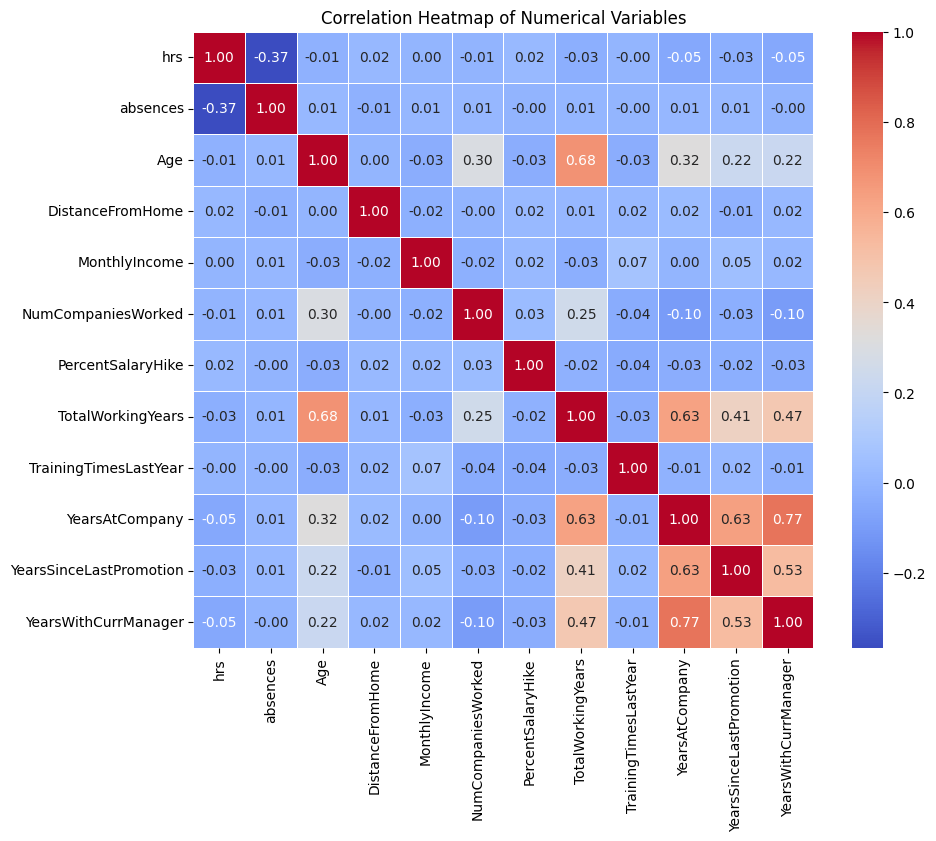

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = avdata[numerical_vars].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()


In [11]:
# # For continuous variables vs Attrition
# for num_col in numerical_vars:
#     plt.figure(figsize=(3, 2))
#     sns.boxplot(x=avdata['Attrition'], y=avdata[num_col], palette="Set3")
#     plt.title(f"Boxplot of {num_col} by Attrition")
#     plt.show()

#     # You can also use violin plots instead of boxplots
#     plt.figure(figsize=(3, 2))
#     sns.violinplot(x=avdata['Attrition'], y=avdata[num_col], palette="Set3")
#     plt.title(f"Violin plot of {num_col} by Attrition")
#     plt.show()

# # For categorical variables vs Attrition
# for cat_col in categorical_vars:
#     plt.figure(figsize=(3, 2))
#     sns.countplot(x=avdata[cat_col], hue=avdata['Attrition'], palette="Set2")
#     plt.title(f"Count plot of {cat_col} by Attrition")
#     plt.xticks(rotation=45)
#     plt.show()


Make these into sensible sentences.

Job involvement
59% 3.0

Performance rating
Either 3 or 4, 84% 3.0

Environment Satisfaction, Job Satisfaction 
Balanced

WorkLifeBalance
60% 3.0

BusinessTravel
71% travels rarely

Department
66% R&D

Education
3 39%, 4 28%

Education Field
Life Sci 40%, medical 32%

JobLevel
1 38%, 2 35.8%


## 1.2. Minor Changes to the Original Dataset
Lastly, we will need to drop constant variables and the ID column.

In [12]:
avdata = avdata.drop(columns = ["EmployeeID", "EmployeeCount", "Over18", "StandardHours"])

# # Make categorical values categorical
# avdata[categorical_vars] = avdata[categorical_vars].astype('category')

# # Convert binary variables to 0 and 1
# avdata['Attrition'] = avdata['Attrition'].map({'No': 0, 'Yes': 1})  # Example for Attrition
# avdata['Gender'] = avdata['Gender'].map({'Male': 0, 'Female': 1})  # Example for Gender

# # Verify the conversion
# print(avdata.dtypes)

In [13]:
X_df = avdata.drop('Attrition', axis= 1)
y_df = avdata["Attrition"]

# 2. Setup
## 2.1. Dummy

In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split


# Binary conversion function
def binary_conversion(df):
    # df['Attrition'] = df['Attrition'].map({'No': 0, 'Yes': 1})
    df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
    return df

# Create the categorical transformer
categorical_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# Define the ordinal variables and their categories for the ordinal transformation
ordinal_vars = {
    "JobInvolvement": [1.0, 2.0, 3.0, 4.0],
    "PerformanceRating": [3.0, 4.0],
    "EnvironmentSatisfaction": [1.0, 2.0, 3.0, 4.0],
    "JobSatisfaction": [1.0, 2.0, 3.0, 4.0],
    "WorkLifeBalance": [1.0, 2.0, 3.0, 4.0],
    "JobLevel": [1.0, 2.0, 3.0, 4.0, 5.0],
    "Education": [1.0, 2.0, 3.0, 4.0, 5.0],
}

ordinal_columns = list(ordinal_vars.keys())
ordinal_categories = list(ordinal_vars.values())

# Create an ordinal encoder with specified categories
ordinal_transformer = OrdinalEncoder(categories=ordinal_categories)

# Create a ColumnTransformer for ordinal variables
ordinal_preprocessor = ColumnTransformer(
    transformers=[
        ("ordinal", ordinal_transformer, ordinal_columns)
    ],
    remainder="passthrough"
)

# Create the column transformer for numerical and categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, categorical_vars),
        ("ordinal", ordinal_transformer, ordinal_columns)
    ]
)

# Create the pipeline
pipeline = Pipeline(steps=[
    ("binary_conversion", FunctionTransformer(lambda x: binary_conversion(x), validate=False)),
    ("preprocessor", preprocessor)
])

# Apply the pipeline to the data
X = pipeline.fit_transform(X_df)


from sklearn import preprocessing
from sklearn.dummy import DummyClassifier


le = preprocessing.LabelEncoder()
le.fit(y_df)

y = le.transform(y_df)
print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

# Initialize DummyClassifier with "most_frequent" strategy
dummy_clf = DummyClassifier(strategy="most_frequent", random_state=42)

# Fit the dummy model using only y_train
dummy_clf.fit(None, y_train)  # No se requiere X_train

# Predict on the test set
dummy_predictions = dummy_clf.predict(X_test)

# Evaluate the dummy model
dummy_accuracy = accuracy_score(y_test, dummy_predictions)

# Print results
print(f"Dummy Model (Most Frequent Class) Accuracy: {dummy_accuracy:.3f}")



[0 0 0 ... 0 1 0]
Dummy Model (Most Frequent Class) Accuracy: 0.838


## 2.2. KNN with default hyper-parameters, with standard scaler 

In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OrdinalEncoder


# Binary conversion function
def binary_conversion(df):
    # df['Attrition'] = df['Attrition'].map({'No': 0, 'Yes': 1})
    df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
    return df

#Create the numerical transformer
numerical_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

# Create the categorical transformer
categorical_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# Define the ordinal variables and their categories for the ordinal transformation
ordinal_vars = {
    "JobInvolvement": [1.0, 2.0, 3.0, 4.0],
    "PerformanceRating": [3.0, 4.0],
    "EnvironmentSatisfaction": [1.0, 2.0, 3.0, 4.0],
    "JobSatisfaction": [1.0, 2.0, 3.0, 4.0],
    "WorkLifeBalance": [1.0, 2.0, 3.0, 4.0],
    "JobLevel": [1.0, 2.0, 3.0, 4.0, 5.0],
    "Education": [1.0, 2.0, 3.0, 4.0, 5.0],
}
ordinal_columns = list(ordinal_vars.keys())
ordinal_categories = list(ordinal_vars.values())

# Create an ordinal encoder with specified categories
ordinal_transformer = OrdinalEncoder(categories=ordinal_categories)

# Create a ColumnTransformer for ordinal variables
ordinal_preprocessor = ColumnTransformer(
    transformers=[
        ("ordinal", ordinal_transformer, ordinal_columns)
    ],
    remainder="passthrough"
)

# Create the column transformer for numerical and categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, numerical_vars),
        ("cat", categorical_transformer, categorical_vars),
        ("ordinal", ordinal_transformer, ordinal_columns)
    ]
)

# Create the pipeline
pipeline = Pipeline(steps=[
    ("binary_conversion", FunctionTransformer(lambda x: binary_conversion(x), validate=False)),
    ("preprocessor", preprocessor)
])

# Apply the pipeline to the data
X = pipeline.fit_transform(X_df)

# Check the preprocessed data
# print(X)


In [16]:
# print(list(avdata))
# print(len(list(avdata)))

# print(list(X))
# print(len(list(X)))

In [17]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y_df)

y = le.transform(y_df)
print(y)

[0 0 0 ... 0 1 0]


In [18]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import neighbors

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

# Here, we set our model to KNN
clf = neighbors.KNeighborsClassifier()

# We train it
clf.fit(X_train, y_train)

# We obtain predictions on the test set
y_test_pred = clf.predict(X_test)

# We compute accuracy
accuracy_knn = metrics.accuracy_score(y_test, y_test_pred)
print(f"Accuracy of the model: {accuracy_knn} ")

# We finally compute the final model with all available data
final_clf = neighbors.KNeighborsClassifier()
final_clf.fit(X, y)


Accuracy of the model: 0.850669412976313 


KNeighborsClassifier()

In [19]:
from statsmodels.stats.proportion import proportion_confint
print(f"Only {len(y_test)} instances on the testing partition")
print(f"Model accuracy: {accuracy_knn} ")
proportion_confint(len(y_test) * accuracy_knn, len(y_test), method="wilson")

Only 971 instances on the testing partition
Model accuracy: 0.850669412976313 


(0.8268713320298281, 0.8717037991754385)

## 2.3. KNN with default hyper-parameters, with min-max scaler

In [20]:
from sklearn.preprocessing import MinMaxScaler

# Binary conversion function
def binary_conversion(df):
    # df['Attrition'] = df['Attrition'].map({'No': 0, 'Yes': 1})
    df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
    return df

#Create the numerical transformer
numerical_transformer = Pipeline(steps=[
    ("scaler", MinMaxScaler())
])

# Create the categorical transformer
categorical_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# Define the ordinal variables and their categories for the ordinal transformation
ordinal_vars = {
    "JobInvolvement": [1.0, 2.0, 3.0, 4.0],
    "PerformanceRating": [3.0, 4.0],
    "EnvironmentSatisfaction": [1.0, 2.0, 3.0, 4.0],
    "JobSatisfaction": [1.0, 2.0, 3.0, 4.0],
    "WorkLifeBalance": [1.0, 2.0, 3.0, 4.0],
    "JobLevel": [1.0, 2.0, 3.0, 4.0, 5.0],
    "Education": [1.0, 2.0, 3.0, 4.0, 5.0],
}
ordinal_columns = list(ordinal_vars.keys())
ordinal_categories = list(ordinal_vars.values())

# Create an ordinal encoder with specified categories
ordinal_transformer = OrdinalEncoder(categories=ordinal_categories)

# Create a ColumnTransformer for ordinal variables
ordinal_preprocessor = ColumnTransformer(
    transformers=[
        ("ordinal", ordinal_transformer, ordinal_columns)
    ],
    remainder="passthrough"
)

# Create the column transformer for numerical and categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, numerical_vars),
        ("cat", categorical_transformer, categorical_vars),
        ("ordinal", ordinal_transformer, ordinal_columns)
    ]
)

# Create the pipeline
pipeline = Pipeline(steps=[
    ("binary_conversion", FunctionTransformer(lambda x: binary_conversion(x), validate=False)),
    ("preprocessor", preprocessor)
])

# Apply the pipeline to the data
X = pipeline.fit_transform(X_df)

# Check the preprocessed data
# print(X)


In [21]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y_df)

y = le.transform(y_df)
print(y)

[0 0 0 ... 0 1 0]


In [22]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

# Here, we set our model to KNN
clf = neighbors.KNeighborsClassifier()

# We train it
clf.fit(X_train, y_train)

# We obtain predictions on the test set
y_test_pred = clf.predict(X_test)

# We compute accuracy
accuracy_knn = metrics.accuracy_score(y_test, y_test_pred)
print(f"Accuracy of the model: {accuracy_knn} ")

# We finally compute the final model with all available data
final_clf = neighbors.KNeighborsClassifier()
final_clf.fit(X, y)


Accuracy of the model: 0.8290422245108136 


KNeighborsClassifier()

In [23]:
print(f"Only {len(y_test)} instances on the testing partition")
print(f"Model accuracy: {accuracy_knn} ")
proportion_confint(len(y_test) * accuracy_knn, len(y_test), method="wilson")

Only 971 instances on the testing partition
Model accuracy: 0.8290422245108136 


(0.804077330299351, 0.851413872109115)

## 2.4. [DOESNT WORK YET] KNN, using the best scaler, with hyper-parameter tuning


In [ ]:
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler, MinMaxScaler
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.metrics import accuracy_score
# from statsmodels.stats.proportion import proportion_confint
# from scipy.stats import randint as sp_randint

# # Binary conversion function
# def binary_conversion(df):
#     df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
#     return df

# # Define the pipeline
# best_scaler = StandardScaler() 

# pipeline = Pipeline(steps=[
#     ("binary_conversion", FunctionTransformer(lambda x: binary_conversion(x), validate=False)),
#     ("scaler", best_scaler),
#     ("knn", KNeighborsClassifier())
# ])

# # Define hyperparameter search space
# param_dist = {
#     "knn__n_neighbors": sp_randint(1, 30),
#     "knn__weights": ["uniform", "distance"],
#     "knn__metric": ["euclidean", "manhattan", "chebyshev"]
# }

# # Set up RandomizedSearchCV
# random_search = RandomizedSearchCV(
#     estimator=pipeline,
#     param_distributions=param_dist,
#     n_iter=100,
#     cv=5,
#     scoring="accuracy",
#     random_state=42,
#     verbose=1
# )

# # Fit RandomizedSearchCV
# random_search.fit(X_train, y_train)

# # Get the best parameters and best model
# best_params = random_search.best_params_
# best_model = random_search.best_estimator_

# # Make predictions on the test set
# y_pred = best_model.predict(X_test)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# n_test = len(y_test)
# correct_predictions = int(n_test * accuracy)

# # Calculate Confidence Interval
# ci_low, ci_high = proportion_confint(correct_predictions, n_test, method="wilson")

# # Print results
# print(f"Best Hyperparameters: {best_params}")
# print(f"Test Accuracy: {accuracy:.3f}")
# print(f"95% Confidence Interval for Accuracy: [{ci_low:.3f}, {ci_high:.3f}]")


## 2.5. Tree with no Tunning


In [ ]:
# Binary conversion function
def binary_conversion(df):
    # df['Attrition'] = df['Attrition'].map({'No': 0, 'Yes': 1})
    df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
    return df

# Create the categorical transformer
categorical_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# Define the ordinal variables and their categories for the ordinal transformation
ordinal_vars = {
    "JobInvolvement": [1.0, 2.0, 3.0, 4.0],
    "PerformanceRating": [3.0, 4.0],
    "EnvironmentSatisfaction": [1.0, 2.0, 3.0, 4.0],
    "JobSatisfaction": [1.0, 2.0, 3.0, 4.0],
    "WorkLifeBalance": [1.0, 2.0, 3.0, 4.0],
    "JobLevel": [1.0, 2.0, 3.0, 4.0, 5.0],
    "Education": [1.0, 2.0, 3.0, 4.0, 5.0],
}

ordinal_columns = list(ordinal_vars.keys())
ordinal_categories = list(ordinal_vars.values())

# Create an ordinal encoder with specified categories
ordinal_transformer = OrdinalEncoder(categories=ordinal_categories)

# Create a ColumnTransformer for ordinal variables
ordinal_preprocessor = ColumnTransformer(
    transformers=[
        ("ordinal", ordinal_transformer, ordinal_columns)
    ],
    remainder="passthrough"
)

# Create the column transformer for numerical and categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, numerical_vars),
        ("cat", categorical_transformer, categorical_vars),
        ("ordinal", ordinal_transformer, ordinal_columns)
    ]
)

# Create the pipeline
pipeline = Pipeline(steps=[
    ("binary_conversion", FunctionTransformer(lambda x: binary_conversion(x), validate=False)),
    ("preprocessor", preprocessor)
])

# Apply the pipeline to the data
X = pipeline.fit_transform(X_df)

# Check the preprocessed data
# print(X)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Split your data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Initialize the Decision Tree Classifier with default hyperparameters
tree_model = DecisionTreeClassifier(random_state=42)

# Train the model
tree_model.fit(X_train, y_train)

# Predict on the test set
y_pred = tree_model.predict(X_test)

# Evaluate the model
accuracy_trees = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_trees:.2f}")

print(f"Only {len(y_test)} instances on the testing partition")
print(f"Model accuracy: {accuracy_trees} ")
proportion_confint(len(y_test) * accuracy_trees, len(y_test), method="wilson")

print(f"\n\nCriterion: {tree_model.criterion}")  # Criterio de división
print(f"Max Depth: {tree_model.max_depth}")  # Profundidad máxima del árbol
print(f"Min Samples Split: {tree_model.min_samples_split}")  # Mínimo de muestras para dividir un nodo
print(f"Min Samples Leaf: {tree_model.min_samples_leaf}")  # Mínimo de muestras por nodo hoja


## 2.6. Trees with HyperParameter tunning



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from statsmodels.stats.proportion import proportion_confint
from scipy.stats import randint as sp_randint
import pandas as pd

# Define the parameter distribution
param_dist = {
    "criterion": ["gini", "entropy"],
    "max_depth": sp_randint(3, 30),
    "min_samples_split": sp_randint(2, 25),
    "min_samples_leaf": sp_randint(1, 15)
}

# Initialize the Decision Tree Classifier
tree_model = DecisionTreeClassifier(random_state=42)

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=tree_model,
    param_distributions=param_dist,
    n_iter=200,
    cv=5,
    scoring="accuracy",
    random_state=42,
    verbose=1
)

# Fit RandomizedSearchCV on training data
random_search.fit(X_train, y_train)

# Get the best parameters and best model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
n_test = len(y_test)
correct_predictions = int(n_test * accuracy)

# Calculate Confidence Interval
ci_low, ci_high = proportion_confint(correct_predictions, n_test, method="wilson")

# Create a DataFrame of all tries and accuracies
results_df = pd.DataFrame(random_search.cv_results_)
results_df = results_df[[
    'param_criterion', 'param_max_depth', 'param_min_samples_split', 'param_min_samples_leaf', 'mean_test_score'
]].sort_values(by='mean_test_score', ascending=False)

# Print results
print(f"Best Hyperparameters: {best_params}")
print(f"Test Accuracy: {accuracy:.3f}")
print(f"95% Confidence Interval for Accuracy: [{ci_low:.3f}, {ci_high:.3f}]")
print("\nHyperparameter Combinations and Accuracies:")
print(results_df)

